In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm


In [6]:
df = pd.read_csv('train.csv', header=0)

In [7]:
df = df.drop(['Ticket','Cabin'], axis=1)

In [8]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 61.2+ KB


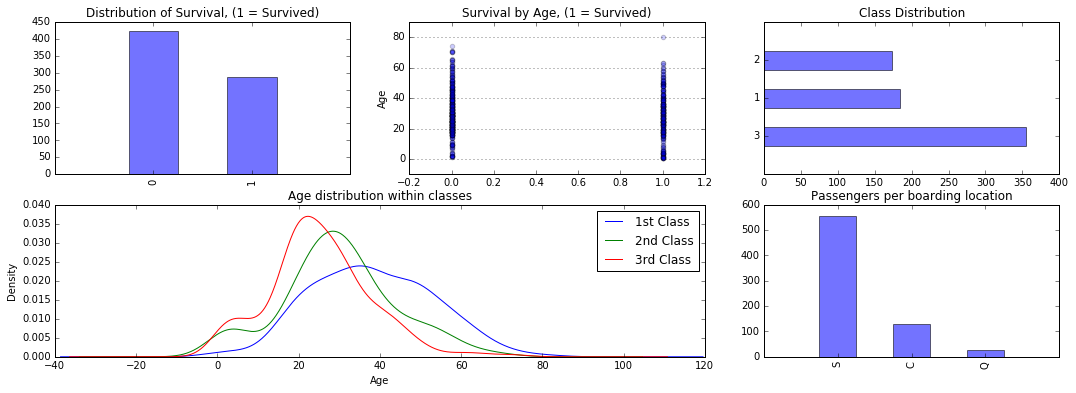

In [57]:
fig = plt.figure(figsize=(18,6), dpi=1600)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of Survival, (1 = Survived)")

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True, which='major', axis='y')
plt.title("Survival by Age, (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1,len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0),colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age distribution within classes')
plt.legend(('1st Class','2nd Class', '3rd Class'), loc='best')

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1,len(df.Embarked.value_counts()))
plt.title("Passengers per boarding location")

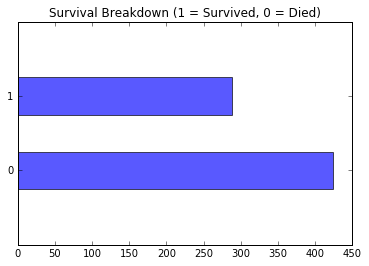

In [65]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color='blue', alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts()))
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

(0, 1)

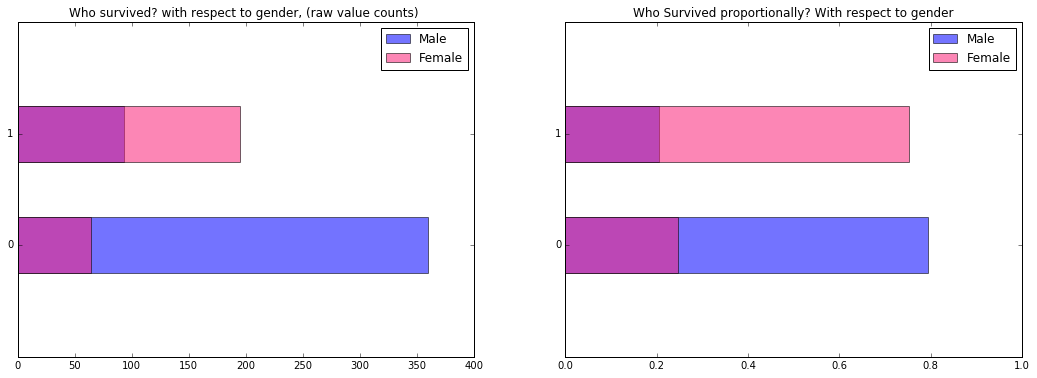

In [102]:
fig = plt.figure(figsize=(18,6))

df_male = df.Survived[df.Sex =='male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh', label='Male', alpha=.55)
df_female.plot(kind='barh', color='#FA2379', label='Female', alpha=.55)
plt.title('Who survived? with respect to gender, (raw value counts) '); plt.legend(loc='best')
ax1.set_ylim(-1,2)

ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh', label='Male', alpha=.55)
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379', label='Female', alpha=.55)
plt.title('Who Survived proportionally? With respect to gender'); plt.legend(loc='best')

ax2.set_ylim(-1,2)
ax2.set_xlim(0,1)

In [72]:
df_female

0     64
1    195
Name: Survived, dtype: int64

In [103]:
from pylab import *

In [116]:
x = np.linspace(0, 5, 10)
y = x ** 2

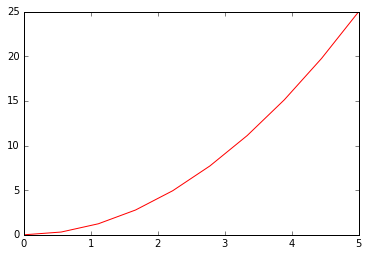

In [117]:
figure()
plot(x, y, 'r')


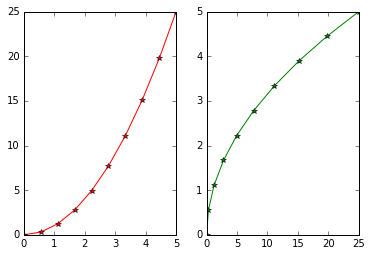

In [122]:
subplot(1,2,1)
plot(x,y,'r*-')
subplot(122)
plot(y, x, 'g*-')